In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
audiData = pd.read_csv("audi.csv")

In [3]:
audiData.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [4]:
audiModel = audiData.iloc[:,0:1].values

In [5]:
from sklearn import preprocessing

In [6]:
le = preprocessing.LabelEncoder()

In [7]:
audiModel[:,0]=le.fit_transform(audiData.iloc[:,0])

In [8]:
ohe = preprocessing.OneHotEncoder()
audiModel = ohe.fit_transform(audiModel).toarray()

In [9]:
audiColumns = audiData["model"].unique()

In [10]:
audiModel = pd.DataFrame(data=audiModel,index=range(10668),columns=audiColumns)

In [11]:
audiModel

,A1,A6,A4,A3,Q3,Q5,A5,S4,Q2,A7,...,RS4,RS5,R8,SQ5,S8,SQ7,S3,S5,A2,RS7
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10663,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10664,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10665,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
newData = audiData.drop(["model"], axis = 1)

In [13]:
audiData = pd.concat([audiModel, newData], axis = 1)

In [14]:
audiData

,A1,A6,A4,A3,Q3,Q5,A5,S4,Q2,A7,...,A2,RS7,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2019,17300,Manual,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10663,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2020,16999,Manual,4018,Petrol,145,49.6,1.0
10664,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2020,16999,Manual,1978,Petrol,150,49.6,1.0
10665,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2020,17199,Manual,609,Petrol,150,49.6,1.0
10666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,2017,19499,Automatic,8646,Petrol,150,47.9,1.4


In [15]:
audiData.describe()

,A1,A6,A4,A3,Q3,Q5,A5,S4,Q2,A7,...,S3,S5,A2,RS7,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,...,10668.000000,10668.0000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,0.126265,0.000094,0.180821,0.129453,0.082677,0.070116,0.011436,0.011061,0.077053,0.132827,...,0.000375,0.0015,0.000750,0.031496,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,0.332164,0.009682,0.384888,0.335716,0.275407,0.255355,0.106331,0.104593,0.266688,0.339404,...,0.019361,0.0387,0.027375,0.174662,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0000,0.000000,0.000000,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0000,0.000000,0.000000,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0000,0.000000,0.000000,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0000,0.000000,0.000000,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.0000,1.000000,1.000000,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


In [16]:
audiData.isnull().sum()

 A1             0
 A6             0
 A4             0
 A3             0
 Q3             0
 Q5             0
 A5             0
 S4             0
 Q2             0
 A7             0
 TT             0
 Q7             0
 RS6            0
 RS3            0
 A8             0
 Q8             0
 RS4            0
 RS5            0
 R8             0
 SQ5            0
 S8             0
 SQ7            0
 S3             0
 S5             0
 A2             0
 RS7            0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

<AxesSubplot:xlabel='price', ylabel='Density'>

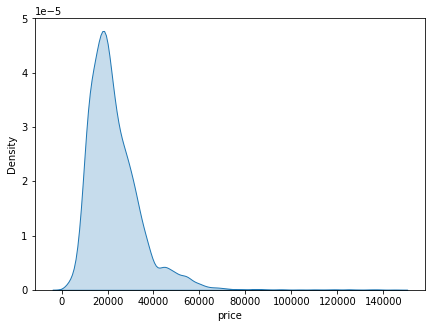

In [17]:
plt.figure(figsize = (7,5))
sbn.kdeplot(audiData["price"], fill=True)

In [18]:
len(audiData) * 0.01

106.68

In [19]:
cleanData = audiData.sort_values("price", ascending = False).iloc[100:]

<AxesSubplot:xlabel='price', ylabel='Density'>

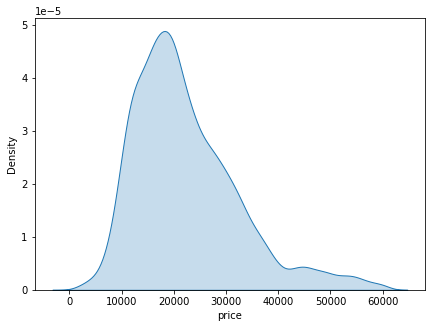

In [20]:
plt.figure(figsize = (7,5))
sbn.kdeplot(cleanData["price"], fill = True)

In [21]:
audiData = cleanData

In [22]:
y = audiData["price"].values
x = audiData.drop(["price", "transmission", "fuelType"], axis = 1).values

In [23]:
y

array([60000, 60000, 60000, ...,  1975,  1699,  1490], dtype=int64)

In [24]:
x

array([[  0. ,   0. ,   0. , ..., 145. ,  35.8,   3. ],
       [  0. ,   0. ,   0. , ..., 145. ,  32.5,   3. ],
       [  0. ,   0. ,   0. , ..., 145. ,  32.5,   3. ],
       ...,
       [  0. ,   0. ,   1. , ..., 240. ,  38.1,   2. ],
       [  0. ,   0. ,   0. , ..., 315. ,  36.2,   2.5],
       [  0. ,   0. ,   1. , ..., 240. ,  44.5,   1.9]])

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 15)

In [27]:
len(x_train)

7397

In [28]:
len(x_test)

3171

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
scaler = MinMaxScaler()

In [31]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [33]:
x_train.shape

(7397, 31)

In [34]:
model = Sequential()

model.add(Dense(12, activation = "relu"))
model.add(Dense(12, activation = "relu"))
model.add(Dense(12, activation = "relu"))

model.add(Dense(1))

model.compile(optimizer = "adam", loss = "mse")
earlyStopping = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 25)

In [35]:
model.fit(x = x_train, y = y_train, epochs = 700, validation_data = (x_test, y_test), verbose = 1, batch_size = 250, callbacks = [earlyStopping,])

Epoch 1/700
30/30 [==============================] - 0s 6ms/step - loss: 599479104.0000 - val_loss: 607852928.0000
Epoch 2/700
30/30 [==============================] - 0s 931us/step - loss: 599454464.0000 - val_loss: 607827584.0000
Epoch 3/700
30/30 [==============================] - 0s 864us/step - loss: 599421312.0000 - val_loss: 607778752.0000
Epoch 4/700
30/30 [==============================] - 0s 898us/step - loss: 599346304.0000 - val_loss: 607661440.0000
Epoch 5/700
30/30 [==============================] - 0s 864us/step - loss: 599158080.0000 - val_loss: 607363776.0000
Epoch 6/700
30/30 [==============================] - 0s 864us/step - loss: 598704640.0000 - val_loss: 606686528.0000
Epoch 7/700
30/30 [==============================] - 0s 898us/step - loss: 597747264.0000 - val_loss: 605339264.0000
Epoch 8/700
30/30 [==============================] - 0s 931us/step - loss: 595937984.0000 - val_loss: 602906624.0000
Epoch 9/700
30/30 [==============================] - 0s 931us/step

30/30 [==============================] - 0s 931us/step - loss: 55631132.0000 - val_loss: 55560660.0000
Epoch 72/700
30/30 [==============================] - 0s 898us/step - loss: 55104120.0000 - val_loss: 55048820.0000
Epoch 73/700
30/30 [==============================] - 0s 864us/step - loss: 54587340.0000 - val_loss: 54562956.0000
Epoch 74/700
30/30 [==============================] - 0s 898us/step - loss: 54084020.0000 - val_loss: 54058308.0000
Epoch 75/700
30/30 [==============================] - 0s 898us/step - loss: 53580500.0000 - val_loss: 53588976.0000
Epoch 76/700
30/30 [==============================] - 0s 898us/step - loss: 53086312.0000 - val_loss: 53116292.0000
Epoch 77/700
30/30 [==============================] - 0s 898us/step - loss: 52603712.0000 - val_loss: 52666592.0000
Epoch 78/700
30/30 [==============================] - 0s 864us/step - loss: 52132772.0000 - val_loss: 52202636.0000
Epoch 79/700
30/30 [==============================] - 0s 898us/step - loss: 51662860.

30/30 [==============================] - 0s 898us/step - loss: 30251084.0000 - val_loss: 31409022.0000
Epoch 142/700
30/30 [==============================] - 0s 864us/step - loss: 29962336.0000 - val_loss: 31159728.0000
Epoch 143/700
30/30 [==============================] - 0s 898us/step - loss: 29653162.0000 - val_loss: 30841050.0000
Epoch 144/700
30/30 [==============================] - 0s 898us/step - loss: 29351578.0000 - val_loss: 30584082.0000
Epoch 145/700
30/30 [==============================] - 0s 898us/step - loss: 29058898.0000 - val_loss: 30280066.0000
Epoch 146/700
30/30 [==============================] - 0s 898us/step - loss: 28760494.0000 - val_loss: 30018422.0000
Epoch 147/700
30/30 [==============================] - 0s 897us/step - loss: 28464286.0000 - val_loss: 29737314.0000
Epoch 148/700
30/30 [==============================] - 0s 898us/step - loss: 28174522.0000 - val_loss: 29440456.0000
Epoch 149/700
30/30 [==============================] - 0s 898us/step - loss: 2

30/30 [==============================] - 0s 931us/step - loss: 14608789.0000 - val_loss: 16177247.0000
Epoch 212/700
30/30 [==============================] - 0s 898us/step - loss: 14501335.0000 - val_loss: 16074218.0000
Epoch 213/700
30/30 [==============================] - 0s 864us/step - loss: 14404666.0000 - val_loss: 15968403.0000
Epoch 214/700
30/30 [==============================] - 0s 897us/step - loss: 14301511.0000 - val_loss: 15855794.0000
Epoch 215/700
30/30 [==============================] - 0s 864us/step - loss: 14211495.0000 - val_loss: 15769946.0000
Epoch 216/700
30/30 [==============================] - 0s 898us/step - loss: 14120891.0000 - val_loss: 15672580.0000
Epoch 217/700
30/30 [==============================] - 0s 898us/step - loss: 14037902.0000 - val_loss: 15599180.0000
Epoch 218/700
30/30 [==============================] - 0s 898us/step - loss: 13948122.0000 - val_loss: 15473449.0000
Epoch 219/700
30/30 [==============================] - 0s 898us/step - loss: 1

30/30 [==============================] - 0s 931us/step - loss: 10868571.0000 - val_loss: 12343063.0000
Epoch 282/700
30/30 [==============================] - 0s 1ms/step - loss: 10845582.0000 - val_loss: 12324679.0000
Epoch 283/700
30/30 [==============================] - 0s 931us/step - loss: 10820477.0000 - val_loss: 12300871.0000
Epoch 284/700
30/30 [==============================] - 0s 898us/step - loss: 10801047.0000 - val_loss: 12282084.0000
Epoch 285/700
30/30 [==============================] - 0s 931us/step - loss: 10784819.0000 - val_loss: 12252318.0000
Epoch 286/700
30/30 [==============================] - 0s 898us/step - loss: 10752700.0000 - val_loss: 12227587.0000
Epoch 287/700
30/30 [==============================] - 0s 898us/step - loss: 10728888.0000 - val_loss: 12224923.0000
Epoch 288/700
30/30 [==============================] - 0s 898us/step - loss: 10706646.0000 - val_loss: 12193589.0000
Epoch 289/700
30/30 [==============================] - 0s 898us/step - loss: 106

30/30 [==============================] - 0s 964us/step - loss: 9753860.0000 - val_loss: 11237933.0000
Epoch 352/700
30/30 [==============================] - 0s 898us/step - loss: 9745049.0000 - val_loss: 11238240.0000
Epoch 353/700
30/30 [==============================] - 0s 931us/step - loss: 9733381.0000 - val_loss: 11219391.0000
Epoch 354/700
30/30 [==============================] - 0s 931us/step - loss: 9729452.0000 - val_loss: 11202079.0000
Epoch 355/700
30/30 [==============================] - 0s 931us/step - loss: 9714528.0000 - val_loss: 11188563.0000
Epoch 356/700
30/30 [==============================] - 0s 931us/step - loss: 9703917.0000 - val_loss: 11173551.0000
Epoch 357/700
30/30 [==============================] - 0s 931us/step - loss: 9690530.0000 - val_loss: 11171338.0000
Epoch 358/700
30/30 [==============================] - 0s 898us/step - loss: 9681307.0000 - val_loss: 11156157.0000
Epoch 359/700
30/30 [==============================] - 0s 898us/step - loss: 9683917.0

Epoch 422/700
30/30 [==============================] - 0s 931us/step - loss: 9042519.0000 - val_loss: 10488244.0000
Epoch 423/700
30/30 [==============================] - 0s 898us/step - loss: 9038940.0000 - val_loss: 10477777.0000
Epoch 424/700
30/30 [==============================] - 0s 898us/step - loss: 9040404.0000 - val_loss: 10468356.0000
Epoch 425/700
30/30 [==============================] - 0s 898us/step - loss: 9026023.0000 - val_loss: 10484514.0000
Epoch 426/700
30/30 [==============================] - 0s 898us/step - loss: 9021876.0000 - val_loss: 10451560.0000
Epoch 427/700
30/30 [==============================] - 0s 898us/step - loss: 9006302.0000 - val_loss: 10445341.0000
Epoch 428/700
30/30 [==============================] - 0s 864us/step - loss: 8998772.0000 - val_loss: 10448016.0000
Epoch 429/700
30/30 [==============================] - 0s 898us/step - loss: 8994614.0000 - val_loss: 10431442.0000
Epoch 430/700
30/30 [==============================] - 0s 898us/step - l

30/30 [==============================] - 0s 931us/step - loss: 8614018.0000 - val_loss: 10035229.0000
Epoch 493/700
30/30 [==============================] - 0s 931us/step - loss: 8616649.0000 - val_loss: 10021376.0000
Epoch 494/700
30/30 [==============================] - 0s 898us/step - loss: 8605823.0000 - val_loss: 10024474.0000
Epoch 495/700
30/30 [==============================] - 0s 898us/step - loss: 8600550.0000 - val_loss: 10019813.0000
Epoch 496/700
30/30 [==============================] - 0s 898us/step - loss: 8610616.0000 - val_loss: 10008161.0000
Epoch 497/700
30/30 [==============================] - 0s 898us/step - loss: 8595813.0000 - val_loss: 10002023.0000
Epoch 498/700
30/30 [==============================] - 0s 931us/step - loss: 8587355.0000 - val_loss: 9999471.0000
Epoch 499/700
30/30 [==============================] - 0s 931us/step - loss: 8581497.0000 - val_loss: 9994181.0000
Epoch 500/700
30/30 [==============================] - 0s 931us/step - loss: 8575519.000

30/30 [==============================] - 0s 864us/step - loss: 8267567.5000 - val_loss: 9629622.0000
Epoch 564/700
30/30 [==============================] - 0s 898us/step - loss: 8265285.5000 - val_loss: 9617456.0000
Epoch 565/700
30/30 [==============================] - 0s 898us/step - loss: 8259671.0000 - val_loss: 9610039.0000
Epoch 566/700
30/30 [==============================] - 0s 931us/step - loss: 8255126.5000 - val_loss: 9608179.0000
Epoch 567/700
30/30 [==============================] - 0s 898us/step - loss: 8244950.5000 - val_loss: 9603115.0000
Epoch 568/700
30/30 [==============================] - 0s 898us/step - loss: 8242902.5000 - val_loss: 9595063.0000
Epoch 569/700
30/30 [==============================] - 0s 864us/step - loss: 8240811.5000 - val_loss: 9592519.0000
Epoch 570/700
30/30 [==============================] - 0s 864us/step - loss: 8237258.0000 - val_loss: 9583539.0000
Epoch 571/700
30/30 [==============================] - 0s 864us/step - loss: 8229122.5000 - va

30/30 [==============================] - 0s 931us/step - loss: 7928142.5000 - val_loss: 9254794.0000
Epoch 635/700
30/30 [==============================] - 0s 964us/step - loss: 7926816.0000 - val_loss: 9239608.0000
Epoch 636/700
30/30 [==============================] - 0s 964us/step - loss: 7920794.5000 - val_loss: 9231263.0000
Epoch 637/700
30/30 [==============================] - 0s 931us/step - loss: 7922453.5000 - val_loss: 9226638.0000
Epoch 638/700
30/30 [==============================] - 0s 931us/step - loss: 7911275.5000 - val_loss: 9219543.0000
Epoch 639/700
30/30 [==============================] - 0s 931us/step - loss: 7923407.0000 - val_loss: 9252144.0000
Epoch 640/700
30/30 [==============================] - 0s 931us/step - loss: 7906492.0000 - val_loss: 9199904.0000
Epoch 641/700
30/30 [==============================] - 0s 931us/step - loss: 7896090.0000 - val_loss: 9200270.0000
Epoch 642/700
30/30 [==============================] - 0s 898us/step - loss: 7896567.5000 - va

In [36]:
lossData = pd.DataFrame(model.history.history)

In [37]:
lossData.head()

,loss,val_loss
0,599479104.0,607852928.0
1,599454464.0,607827584.0
2,599421312.0,607778752.0
3,599346304.0,607661440.0
4,599158080.0,607363776.0


<AxesSubplot:>

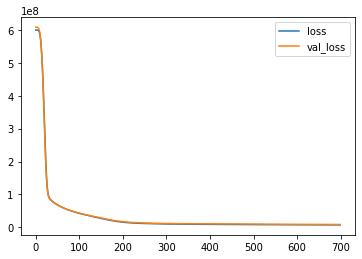

In [38]:
lossData.plot()

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [40]:
predictedArr = model.predict(x_test)

In [41]:
predictedArr

array([[26524.773],
       [14234.349],
       [38024.44 ],
       ...,
       [11501.748],
       [24100.793],
       [13150.347]], dtype=float32)

In [42]:
mean_absolute_error(y_test, predictedArr)

2029.9048681147879

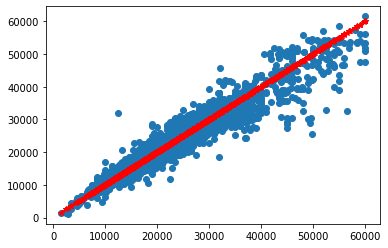

In [43]:
plt.scatter(y_test, predictedArr)
plt.plot(y_test, y_test,"r-*")

In [44]:
realDf = pd.DataFrame(y_test, columns = ["Real Y"])

In [45]:
realDf

,Real Y
0,28888
1,12498
2,37000
3,17000
4,10099
...,...
3166,14199
3167,12285
3168,10990
3169,22495


In [46]:
predictedArr = pd.Series(predictedArr.reshape(3171,))

In [47]:
predictedArr

0       26524.773438
1       14234.348633
2       38024.441406
3       16159.154297
4       11625.840820
            ...     
3166    14504.821289
3167    12243.369141
3168    11501.748047
3169    24100.792969
3170    13150.346680
Length: 3171, dtype: float32

In [48]:
predictedDf = pd.concat([realDf, predictedArr], axis = 1)

In [49]:
predictedDf.columns = ["Real Price", "Predicted Price"]

In [50]:
predictedDf

,Real Price,Predicted Price
0,28888,26524.773438
1,12498,14234.348633
2,37000,38024.441406
3,17000,16159.154297
4,10099,11625.840820
...,...,...
3166,14199,14504.821289
3167,12285,12243.369141
3168,10990,11501.748047
3169,22495,24100.792969


In [51]:
predictedDf.to_excel("predictedPrice.xlsx")